# Bayesian Statistics

## Conditional Probability

Definition: $$ P(A|B) = \frac{P(A, B)}{P(B)} $$

If A and B are independent: $P(A|B) = P(A)$, since $P(A,B)=P(A)P(B)$.

## Bayes Theorem

Since $P(A, B) = P(B, A)$

$$ P(A|B)P(B) = P(B|A)P(A) $$

Therefore

$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$

Example: Monty Hall Problem

1. FREQUENTIST STATISTICAL INFERENCE: $p(A) =$ long-run relative frequency with which A occurs in identical repeats of an experiment. ‘‘A’’ restricted to propositions about random variables.
2. BAYESIAN INFERENCE $p(A|B)$ a real number measure of the plausibility of a proposition/hypothesis A, given (conditional on) the truth of the information represented by proposition B. ‘‘A’’ can be any logical proposition, not restricted to propositions about random variables.

Examples of propositions:

A $\equiv$ ‘‘The newly discovered radio astronomy object is a galaxy.’’

B $\equiv$ ‘‘The measured redshift of the object is $0.150 \pm 0.005$.’’

A $\equiv$ ‘‘Theory X is correct.’’

A $\equiv$ ‘‘Theory X is not correct.’’

A $\equiv$ ‘‘The frequency of the signal is between $f$ and $f + df$.’’

## Hypothesis test

$$ p(H_i|D, I) = \frac{p(H_i|I)p(D|H_i, I)}{p(D|I)} $$

where:

$H_i \equiv$ proposition asserting the truth of a hypothesis of interest

$I \equiv$ proposition representing our prior information (the model)

$D \equiv$ proposition representing data

$p(D|H_i, I) \equiv$ probability of obtaining data $D$; if $H_i$ and $I$ are true also called the likelihood function $\mathcal{L}(\theta)$, where $\theta$ is the model parameters vector.

$p(H_i|I) \equiv$ prior probability of hypothesis, $\Pi (\theta)$.

$p(H_i|D, I) \equiv$ posterior probability of $H_i$, $P(\theta)$

$p(D|I) \equiv$ Evidence or global likelihood ($\mathcal{Z}$). The normalization factor which ensures $$ \int_{S} p(H_i|D, I) d\theta = \int_{S} p(\theta|D, I) d\theta = 1$$. Therefore $$ p(D|I) = \int_{S} p(H_i|I)p(D|H_i, I)d\theta$$

## Example: Spectral line emission

### Data

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
spec = np.loadtxt('spec_line.dat')

channels = np.arange(1, 65)

Text(0, 0.5, 'Signal (mK)')

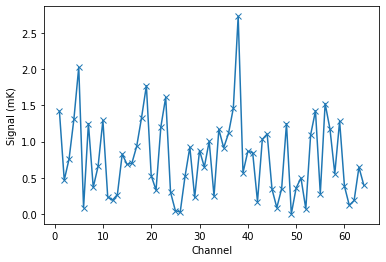

In [3]:
plt.plot(channels, spec, 'x-')

plt.xlabel('Channel')
plt.ylabel('Signal (mK)')

### Hypothesis (Models)

$M_1$: Gaussian shape: $$ T(\nu) = T_0\times f(\nu) = T_0 \exp\left[ -\frac{(\nu-\nu_0)^2}{2 \sigma_L^2} \right]$$

where

$T_0$: Signal amplitude

$\nu_0$: Signal frequency

$\sigma_L$: Signal width

In [5]:
nu = np.arange(0, 65)

T0 = 2.5
nu0 = 36
sigL = 5



Text(0, 0.5, 'Signal (mK)')

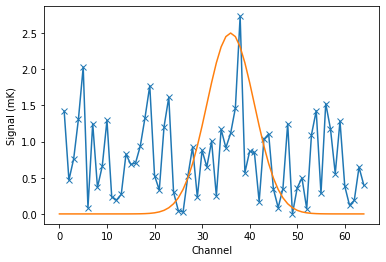

In [6]:
T = T0*np.exp(-.5*((nu-nu0)/sigL)**2)

plt.plot(channels, spec, 'x-')
plt.plot(nu, T)

plt.xlabel('Channel')
plt.ylabel('Signal (mK)')

### Parameter estimation

Posterior:

$$ P(\theta) = \frac{\mathcal{L}(\theta)\Pi(\theta)}{\mathcal{Z}} $$

The best fit value is that which maximizes the posterior:

Prior: Uniform on all parameters $$ 0 < T_0 < T_{max} ~~~~~ 1 \leq \nu_0 \leq 64 ~~~~~ 1 \leq \sigma_L \leq 63$$

Likelihood: Normal noise, i.e. $\epsilon = T_i - T_0 \times f(\nu_i) \sim \sigma \mathcal{N}(0,1)$, therefore

$$ \mathcal{L_i}(T_0, \nu_0, \sigma_L) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left\{- \frac{[T_i-T_0\times f(\nu_i)]^2}{2\sigma^2} \right\} $$

$$ \mathcal{L}(T_0, \nu_0, \sigma_L) = \prod_i \mathcal{L_i}(T_0, \nu_0, \sigma_L) $$

In [44]:
T0 = np.linspace(0, spec.max())

T0

array([0.        , 0.0557551 , 0.1115102 , 0.16726531, 0.22302041,
       0.27877551, 0.33453061, 0.39028571, 0.44604082, 0.50179592,
       0.55755102, 0.61330612, 0.66906122, 0.72481633, 0.78057143,
       0.83632653, 0.89208163, 0.94783673, 1.00359184, 1.05934694,
       1.11510204, 1.17085714, 1.22661224, 1.28236735, 1.33812245,
       1.39387755, 1.44963265, 1.50538776, 1.56114286, 1.61689796,
       1.67265306, 1.72840816, 1.78416327, 1.83991837, 1.89567347,
       1.95142857, 2.00718367, 2.06293878, 2.11869388, 2.17444898,
       2.23020408, 2.28595918, 2.34171429, 2.39746939, 2.45322449,
       2.50897959, 2.56473469, 2.6204898 , 2.6762449 , 2.732     ])

In [45]:
nu0=np.linspace(1, 64, 80)

nu0

array([ 1.        ,  1.79746835,  2.59493671,  3.39240506,  4.18987342,
        4.98734177,  5.78481013,  6.58227848,  7.37974684,  8.17721519,
        8.97468354,  9.7721519 , 10.56962025, 11.36708861, 12.16455696,
       12.96202532, 13.75949367, 14.55696203, 15.35443038, 16.15189873,
       16.94936709, 17.74683544, 18.5443038 , 19.34177215, 20.13924051,
       20.93670886, 21.73417722, 22.53164557, 23.32911392, 24.12658228,
       24.92405063, 25.72151899, 26.51898734, 27.3164557 , 28.11392405,
       28.91139241, 29.70886076, 30.50632911, 31.30379747, 32.10126582,
       32.89873418, 33.69620253, 34.49367089, 35.29113924, 36.08860759,
       36.88607595, 37.6835443 , 38.48101266, 39.27848101, 40.07594937,
       40.87341772, 41.67088608, 42.46835443, 43.26582278, 44.06329114,
       44.86075949, 45.65822785, 46.4556962 , 47.25316456, 48.05063291,
       48.84810127, 49.64556962, 50.44303797, 51.24050633, 52.03797468,
       52.83544304, 53.63291139, 54.43037975, 55.2278481 , 56.02

In [46]:
sigL=np.linspace(1, 63, 100)

sigL

array([ 1.        ,  1.62626263,  2.25252525,  2.87878788,  3.50505051,
        4.13131313,  4.75757576,  5.38383838,  6.01010101,  6.63636364,
        7.26262626,  7.88888889,  8.51515152,  9.14141414,  9.76767677,
       10.39393939, 11.02020202, 11.64646465, 12.27272727, 12.8989899 ,
       13.52525253, 14.15151515, 14.77777778, 15.4040404 , 16.03030303,
       16.65656566, 17.28282828, 17.90909091, 18.53535354, 19.16161616,
       19.78787879, 20.41414141, 21.04040404, 21.66666667, 22.29292929,
       22.91919192, 23.54545455, 24.17171717, 24.7979798 , 25.42424242,
       26.05050505, 26.67676768, 27.3030303 , 27.92929293, 28.55555556,
       29.18181818, 29.80808081, 30.43434343, 31.06060606, 31.68686869,
       32.31313131, 32.93939394, 33.56565657, 34.19191919, 34.81818182,
       35.44444444, 36.07070707, 36.6969697 , 37.32323232, 37.94949495,
       38.57575758, 39.2020202 , 39.82828283, 40.45454545, 41.08080808,
       41.70707071, 42.33333333, 42.95959596, 43.58585859, 44.21

In [68]:
sigma = spec.std()

mean = np.median(spec)

sigma

0.5509192032465917

In [69]:
channels

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

In [70]:
spec

array([1.420e+00, 4.680e-01, 7.620e-01, 1.312e+00, 2.029e+00, 8.600e-02,
       1.249e+00, 3.680e-01, 6.570e-01, 1.294e+00, 2.350e-01, 1.920e-01,
       2.690e-01, 8.270e-01, 6.850e-01, 7.020e-01, 9.370e-01, 1.331e+00,
       1.772e+00, 5.300e-01, 3.300e-01, 1.205e+00, 1.613e+00, 3.000e-01,
       4.600e-02, 2.600e-02, 5.190e-01, 9.240e-01, 2.300e-01, 8.770e-01,
       6.500e-01, 1.004e+00, 2.480e-01, 1.169e+00, 9.150e-01, 1.113e+00,
       1.463e+00, 2.732e+00, 5.710e-01, 8.650e-01, 8.490e-01, 1.710e-01,
       1.031e+00, 1.105e+00, 3.440e-01, 8.700e-02, 3.510e-01, 1.248e+00,
       1.000e-03, 3.600e-01, 4.970e-01, 7.200e-02, 1.094e+00, 1.425e+00,
       2.830e-01, 1.526e+00, 1.174e+00, 5.580e-01, 1.282e+00, 3.840e-01,
       1.200e-01, 1.870e-01, 6.460e-01, 3.990e-01])

In [72]:
def Likelihood(T0, nu0, sigL):
    
    T_obs = spec
    
    nu = channels
    T_th = mean + T0 * np.exp(-.5*((nu-nu0)/sigL)**2)
    
    dT = (T_obs - T_th)/sigma
    
    return np.exp(-0.5*dT**2).prod()

In [73]:
vLikelihood = np.vectorize(Likelihood)

In [74]:
T0_grid, nu0_grid, sigL_grid = np.meshgrid(T0, nu0, sigL)

In [75]:
sigL_grid.shape

(80, 50, 100)

In [76]:
L = vLikelihood(T0_grid, nu0_grid, sigL_grid)

In [77]:
L.max()

3.645651014633904e-12

In [78]:
Lr = L.ravel()

i = np.argmax(Lr)

In [79]:
Lr[i]

3.645651014633904e-12

In [80]:
T0r = T0_grid.ravel()
nu0r = nu0_grid.ravel()
sigLr = sigL_grid.ravel()

In [81]:
T0r[i], nu0r[i], sigLr[i]

(1.505387755102041, 37.68354430379747, 1.0)

Text(0, 0.5, 'Signal (mK)')

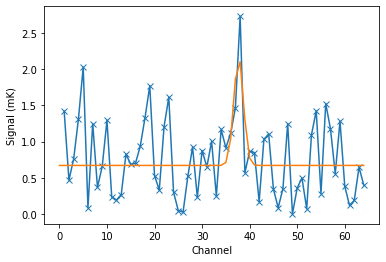

In [83]:
T = mean + T0r[i]*np.exp(-.5*((nu-nu0r[i])/sigLr[i])**2)

plt.plot(channels, spec, 'x-')
plt.plot(nu, T)

plt.xlabel('Channel')
plt.ylabel('Signal (mK)')